Facial Expression Detection

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import PIL


Preprocessing Data

In [3]:
data = pd.read_csv('fer2013.csv')
data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
emotion_dict =  {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

emotion_count_all = data.emotion.value_counts(sort=False).reset_index()
emotion_count_all 



emotion_count_all.columns = ["emotion","count"]
emotion_count_all["emotion"] = emotion_count_all["emotion"].map(emotion_dict)



Visualized Dataset

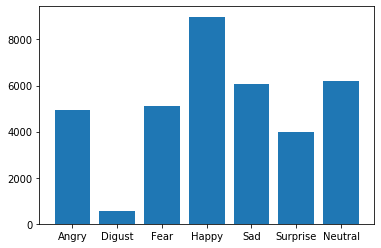

In [10]:

plt.bar(emotion_count_all["emotion"],emotion_count_all["count"])
plt.show()

img_shape = (48, 48, 3) 


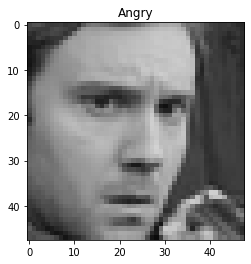

img_shape = (48, 48, 3) 


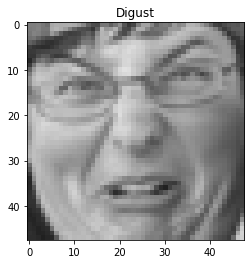

img_shape = (48, 48, 3) 


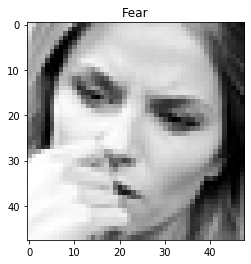

img_shape = (48, 48, 3) 


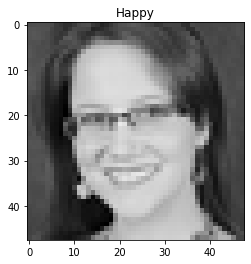

img_shape = (48, 48, 3) 


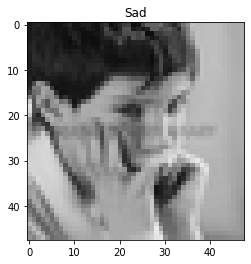

img_shape = (48, 48, 3) 


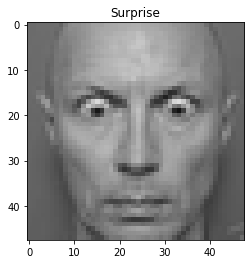

img_shape = (48, 48, 3) 


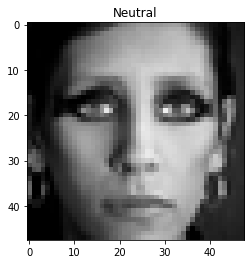

In [14]:

def row2img(raw):
    
    pixels = raw['pixels']
    
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    
    


    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    
    print("img_shape = {} ".format(image.shape))
    
    return np.array(image.astype(np.uint8))
    
nb_image2show = 8
for i in range(7):
    raw =  data[data["emotion"] == i].iloc[0]
    img = row2img(raw)
    emotion = emotion_dict[raw["emotion"]]
    
    plt.imshow(img)
    plt.title(emotion)
    plt.show()
    

Split dataset train,val,test

In [29]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}\n, validation shape: {}\n, test shape: {}\n".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3)
, validation shape: (3589, 3)
, test shape: (3589, 3)



In [30]:
width, height = 48, 48

def CRNO(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
     
    img = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height)/255.0 
    
    print("img = {} ".format(img.shape))
    
    data_X = np.zeros((df.shape[0], width,height,3))
    data_X[:,:,:,0] = img
    data_X[:,:,:,1] = img
    data_X[:,:,:,2] = img
    
    data_Y = df['emotion']  
    print(dataName, "_X shape: {}, ", dataName, "_Y shape: {}".format(data_X.shape, data_Y.shape))
    
    return data_X, data_Y


print(data_train.head(5))



train_X, train_Y = CRNO(data_train, "train") #training data
print("train_x = {} ".format(train_X))


# val_X, val_Y     = CRNO(data_val, "val") #validation data
# test_X, test_Y   = CRNO(data_test, "test") #test data

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
img = (28709, 48, 48) 
train _X shape: {},  train _Y shape: (28709, 48, 48, 3)
train_x = [[[[0.27450982 0.27450982 0.27450982]
   [0.3137255  0.3137255  0.3137255 ]
   [0.32156864 0.32156864 0.32156864]
   ...
   [0.20392157 0.20392157 0.20392157]
   [0.16862746 0.16862746 0.16862746]
   [0.16078432 0.16078432 0.16078432]]

  [[0.25490198 0.25490198 0.25490198]
   [0.23921569 0.23921569 0.23921569]
   [0.22745098 0.22745098 0.22745098]
   ...
   [0.21960784 0.21960784 0.21960784]
   [0.20392157 0.20392157 0.20392157]
   [0.17254902 0.17254902 0.17254902]]

  [[0

In [115]:
np.save("train_X",train_X)
np.save("train_Y",train_Y)
np.save("val_X",val_X)
np.save("val_Y",val_Y)
np.save("test_X",test_X)
np.save("test_Y",test_Y)

In [27]:
train_X.shape

NameError: name 'train_X' is not defined

In [ ]:
convert array to 

shape first image = (48, 48, 3) 
img_to = <PIL.Image.Image image mode=RGB size=48x48 at 0x7F808BCD82D0> 
x = torch.Size([3, 48, 48]) 


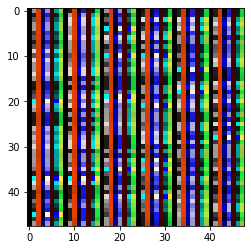

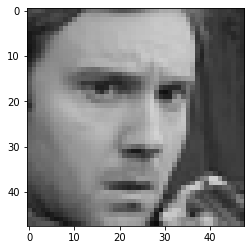

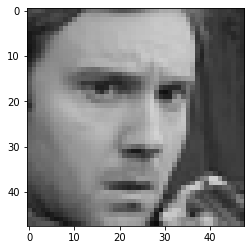

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


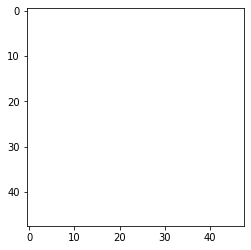

<PIL.Image.Image image mode=RGB size=48x48 at 0x7F808BCD82D0>


In [39]:

print("shape first image = {} ".format(train_X[0].shape))
img_to = transforms.ToPILImage(mode="RGB")
x = transforms.ToTensor()(train_X[0]*255)
img_to = img_to(train_X[0])



print("img_to = {} ".format(img_to))

print("x = {} ".format(x.shape))
x = x.reshape(48,48,3)

plt.imshow(img_to)
plt.show()



plt.imshow(img)
plt.show()



plt.imshow(train_X[0])
plt.show()

plt.imshow(x)
plt.show()

#plt.imshow(img_to)
#plt.show()


print(img_to)

In [4]:
TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [52]:
img = PIL.Image.fromarray(np.uint8(train_X[0]))
print(img)

.shape

<PIL.Image.Image image mode=RGB size=48x48 at 0x7F2B8B223850>


TypeError: img should be PIL Image. Got <class 'torchvision.transforms.transforms.ToPILImage'>

Load Model

In [113]:

all_trans = []
n_bach = 10
for i in range(n_bach):
    img_to = transforms.ToPILImage(mode="RGB")
    img_to = img_to(train_X[0])
    i_t = TRANSFORMS(img_to)
    all_trans.append(i_t)
    
print("all_trans = {} , shape_1 = {}".format(len(all_trans[0]),all_trans[0].shape))

all_tran = torch.cat(all_trans,axis=0)
all_tran = all_tran.reshape(n_bach,3,224,224)

# i_t.unsqueeze_(0)


ouput = model(all_tran)

print(ouput.shape)



all_trans = 3 , shape_1 = torch.Size([3, 224, 224])
torch.Size([10, 7])


## Train model

In [138]:
max_dataset = 100

x_train = train_X
y_train = train_Y
dataset_x = x_train
dataset_y = y_train



train_x_loader = torch.utils.data.DataLoader(
        dataset_x,
        batch_size=8,
        shuffle=False
    )

train_y_loader = torch.utils.data.DataLoader(
        dataset_y,
        batch_size=8,
        shuffle=False
    )

print("first_data = ",next(iter(train_x_loader)).shape)
indice = 0
for dt_x  in iter(train_x_loader):
    all_trans = []
    
    print("indice = {} ".format(indice))
    print("dt_x = {}",dt_x.shape)

    indice += 1 
#     for i in range(dt_x.shape[0]): 
#         img_to = transforms.ToPILImage(mode="RGB")
#         img_to = img_to(train_X[i])
#         i_t = TRANSFORMS(img_to)
#         all_trans.append(i_t)
#     all_tran = torch.cat(all_trans,axis=0)
#     all_tran = all_tran.reshape(dt_x.shape[0],3,224,224)
    
#     ouput = model(all_tran)

    
    
    
    
    

first_data =  torch.Size([8, 48, 48, 3])
indice = 0 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 4 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 5 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 6 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 7 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 8 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 9 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 10 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 11 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 12 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 13 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 14 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 15 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 16 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 17 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 18 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 19 
dt_x =

indice = 472 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 473 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 474 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 475 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 476 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 477 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 478 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 479 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 480 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 481 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 482 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 483 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 484 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 485 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 486 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 487 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 488 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 489 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 490 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 491 
dt_x = {} torch.S

indice = 972 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 973 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 974 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 975 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 976 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 977 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 978 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 979 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 980 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 981 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 982 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 983 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 984 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 985 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 986 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 987 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 988 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 989 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 990 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 991 
dt_x = {} torch.S

indice = 1478 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1479 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1480 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1481 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1482 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1483 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1484 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1485 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1486 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1487 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1488 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1489 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1490 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1491 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1492 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1493 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1494 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1495 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1496 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 149

indice = 1968 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1969 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1970 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1971 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1972 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1973 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1974 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1975 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1976 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1977 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1978 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1979 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1980 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1981 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1982 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1983 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1984 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1985 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 1986 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 198

indice = 2475 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2476 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2477 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2478 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2479 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2480 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2481 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2482 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2483 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2484 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2485 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2486 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2487 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2488 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2489 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2490 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2491 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2492 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2493 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 249

indice = 2952 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2953 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2954 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2955 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2956 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2957 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2958 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2959 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2960 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2961 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2962 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2963 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2964 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2965 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2966 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2967 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2968 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2969 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 2970 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 297

indice = 3434 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3435 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3436 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3437 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3438 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3439 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3440 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3441 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3442 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3443 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3444 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3445 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3446 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3447 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3448 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3449 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3450 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3451 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 3452 
dt_x = {} torch.Size([8, 48, 48, 3])
indice = 345

In [1]:
import numpy as np 
import PIL
from matplotlib import pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F


import pandas as pd
import numpy as np
import PIL



TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

emotion_dict =  {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


def train_eval(is_training):
    device = torch.device('cuda')


    model = torchvision.models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(512, len(emotion_dict))



    max_dataset = 3

    BATCH_SIZE = 10
    epochs = 100

    optimizer = torch.optim.Adam(model.parameters())
    # optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

    
    #global BATCH_SIZE, LEARNING_RATE, MOMENTUM, model, dataset, optimizer, eval_button, train_button, accuracy_widget, loss_widget, progress_widget, state_widget
    
    x_train = np.load("train_X.npy")
    y_train = np.load("train_Y.npy")
    dataset_x = x_train
    dataset_y = y_train


    train_x_loader = torch.utils.data.DataLoader(
        dataset_x,
        batch_size=8,
        shuffle=False
    )
        
    if is_training:
        model = model.train()
    else:
        model = model.eval()

    while epochs > 0:
        i = 0
        sum_loss = 0.0
        error_count = 0.0

        print("------ epoch = {}".format(epochs))


        indice = 0

        for dt_x  in iter(train_x_loader):
            all_trans = []
            all_labels = []
            
            print("** New bach")
            for j in range(dt_x.shape[0]): 
                #img_to = transforms.ToPILImage(mode="RGB")
                #img_to = img_to(dt_x[j])
                img_to = PIL.Image.fromarray(np.uint8(dt_x[j]*255))
            
                i_t = TRANSFORMS(img_to)
                
                plt.imshow(i_t.reshape(224,224,3))
                plt.show()
                
                break
                
                all_trans.append(i_t)
                all_labels.append(y_train[indice])
                #print("indice = {} ".format(indice))

                indice += 1 

            all_img = torch.cat(all_trans,axis=0)
            #print("all_img_shape = {} ".format(all_img.shape))
            #print("other_shape = {} ".format((dt_x.shape[0],3,all_img.shape[1],all_img.shape[2])))
            all_img = all_img.reshape(dt_x.shape[0],3,all_img.shape[1],all_img.shape[2])


            # send data to gpu

            #print("all_labes B= {} ".format(all_labels))
            all_labels = torch.from_numpy(np.asarray(all_labels)).long()

            #all_labels = torch.Tensor(list(all_labels),dtype=torch.int32)

            #print("all_labes A= {} ".format(all_labels))
            #all_img = all_img.to(device)
            #all_labels = all_labels.to(device)







            if is_training:
                # zero gradients of parameters
                optimizer.zero_grad()

            # execute model to get outputs
            outputs = model(all_img)


            #print("output_shape = {} ".format(outputs.shape))
            #print("output = {} ".format(outputs))
            # compute loss
            # labels
            loss = torch.nn.CrossEntropyLoss()

            #print("all_labels = {} ".format(all_labels))


            loss = loss(outputs, all_labels)



            #loss = F.cross_entropy(outputs, all_labels)

            if is_training:
                # run backpropogation to accumulate gradients
                loss.backward()

                # step optimizer to adjust parameters
                optimizer.step()

            # increment progress
            error_count += len(torch.nonzero(outputs.argmax(1) - all_labels).flatten())
            count = len(all_labels.flatten())
            i += count
            sum_loss += float(loss)
            #print("progress = {} ".format(i / len(dataset_x)))
            print("loss = {}".format(sum_loss / i))
            print("accuracy = {}".format(1.0 - error_count / i))


            #progress_widget.value = i / len(dataset_x)
            #loss_widget.value = sum_loss / i
            #accuracy_widget.value = 1.0 - error_count / i

                
                
                
                
                
            if is_training:
                epochs = epochs - 1
            else:
                break

        
        
    model = model.eval()
    
    torch.save(model.state_dict(), "model_50.pth")

    #train_button.disabled = False
    #eval_button.disabled = False
    #state_widget.value = 'live'

    
train_eval(is_training=True)





# display(train_eval_widget)
print("trainer configured and train_eval_widget created")

------ epoch = 100
** New bach


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 1 Axes>

RuntimeError: expected a non-empty list of Tensors